In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the global font size
plt.rcParams['font.size'] = 16

# Read the CSV file
df = pd.read_csv('../data/rose_perf.csv')

# For weak scaling, manually assign node values based on 'n_workflows' (128, 256, 512, 1024)
weak_scaling_mapping = {
    128: '1',
    256: '2',
    512: '4',
    1024: '8'
}

# Update the 'nodes' column for weak scaling
df['nodes'] = df.apply(lambda row: weak_scaling_mapping.get(row['n_workflows'], row['nodes']), axis=1)

# Separate the dataframe into weak and strong scaling
df_weak = df[df['scaling_type'] == 'weak']
df_strong = df[df['scaling_type'] == 'strong']

df_weak['throughput'] = df_weak['n_workflows'] / df_weak['duration']
df_strong['throughput'] = df_strong['n_workflows'] / df_strong['duration']

/tmp/ipykernel_3377253/3890718177.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weak['throughput'] = df_weak['n_workflows'] / df_weak['duration']
/tmp/ipykernel_3377253/3890718177.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strong['throughput'] = df_strong['n_workflows'] / df_strong['duration']


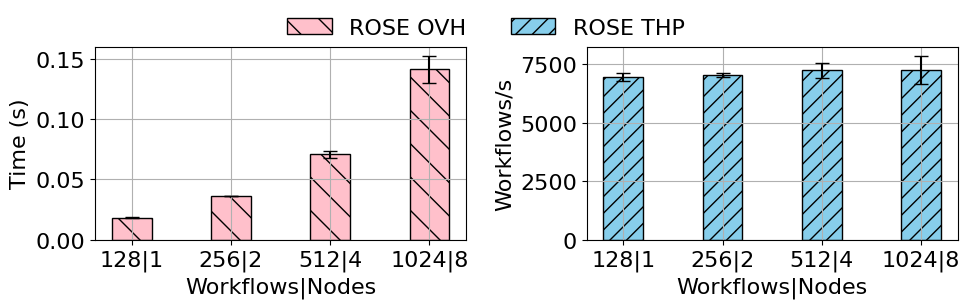

In [2]:
# Calculate mean and standard deviation for weak scaling
summary_weak = df_weak.groupby(['scaling_type', 'nodes']).agg(
    mean_duration=('duration', 'mean'),
    std_duration=('duration', 'std'),
    mean_throughput=('throughput', 'mean'),
    std_throughput=('throughput', 'std')).reset_index()

# Add workflows for weak scaling
summary_weak['workflows'] = [128, 256, 512, 1024]

# Calculate throughput for weak scaling
#summary_weak['throughput'] = summary_weak['workflows'] / summary_weak['mean_duration']

# Create subplots for weak scaling
fig_weak, axes_weak = plt.subplots(1, 2, figsize=(10, 3))  # 1 row, 2 columns for weak scaling

# Custom x-axis labels
xticks_labels = [f'{w}|{n}' for w, n in zip(summary_weak['workflows'], summary_weak['nodes'])]

# Plot 1: Weak Scaling - Mean Duration
axes_weak[0].bar(summary_weak['nodes'], summary_weak['mean_duration'],
                 yerr=summary_weak['std_duration'], capsize=5,
                 color='pink', edgecolor='black', width=0.4, label='ROSE OVH',  hatch='\\')
axes_weak[0].set_xlabel('Workflows|Nodes')
axes_weak[0].set_ylabel('Time (s)')
axes_weak[0].set_xticks(summary_weak['nodes'])  # Set the positions of the ticks
axes_weak[0].set_xticklabels(xticks_labels)     # Set the labels for the ticks
axes_weak[0].grid()

# Plot 2: Weak Scaling - Throughput
axes_weak[1].bar(summary_weak['nodes'], summary_weak['mean_throughput'],
                 yerr=summary_weak['std_throughput'],
                 capsize=5, color='skyblue', edgecolor='black', width=0.4, label='ROSE THP', hatch='//')
axes_weak[1].set_xlabel('Workflows|Nodes')
axes_weak[1].set_ylabel('Workflows/s')
axes_weak[1].set_xticks(summary_weak['nodes'])  # Set the positions of the ticks
axes_weak[1].set_xticklabels(xticks_labels)     # Set the labels for the ticks
axes_weak[1].grid()

# Adjust layout for weak scaling plots
plt.tight_layout()
fig_weak.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.08), frameon=False)
# Save the weak scaling plots to a file
fig_weak.savefig('weak_scaling_plots.png', dpi=300, bbox_inches='tight')

# Show the plot for weak scaling
plt.show()

In [6]:
summary_weak

,scaling_type,nodes,mean_duration,std_duration,mean_throughput,std_throughput,workflows
0,weak,1,0.018388,0.000415,6963.446675,155.515467,128
1,weak,2,0.036309,0.000356,7051.047855,69.543976,256
2,weak,4,0.070737,0.002966,7246.724526,310.299210,512
3,weak,8,0.141322,0.011177,7277.134145,593.167462,1024


/tmp/ipykernel_3377253/3827187468.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_strong[0].set_xticklabels(xticks_labels)
/tmp/ipykernel_3377253/3827187468.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes_strong[1].set_xticklabels(xticks_labels)


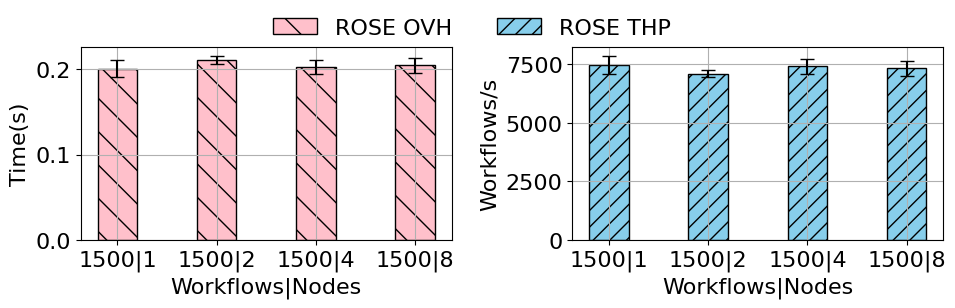

In [4]:
# Calculate mean and standard deviation for strong scaling
summary_strong = df_strong.groupby(['scaling_type', 'nodes']).agg(
    mean_duration=('duration', 'mean'),
    std_duration=('duration', 'std'),
    mean_throughput=('throughput', 'mean'),
    std_throughput=('throughput', 'std')).reset_index()

# Add workflows for strong scaling
summary_strong['workflows'] = [1500, 1500, 1500, 1500]


# Create subplots for strong scaling
fig_strong, axes_strong = plt.subplots(1, 2, figsize=(10, 3)) # 1 row, 2 columns for strong scaling

xticks_labels = [f'{w}|{n}' for w, n in zip(summary_strong['workflows'], [1,2,4,8])]

# Plot 1: Strong Scaling - Mean Duration
axes_strong[0].bar(summary_strong['nodes'], summary_strong['mean_duration'], 
                   yerr=summary_strong['std_duration'], capsize=5, 
                   color='pink', edgecolor='black', width=0.4, label='ROSE OVH', hatch='\\')
axes_strong[0].set_xlabel('Workflows|Nodes')
axes_strong[0].set_ylabel('Time(s)')
axes_strong[0].set_xticklabels(xticks_labels) 
axes_strong[0].grid()

# Plot 2: Strong Scaling - Throughput
axes_strong[1].bar(summary_strong['nodes'], summary_strong['mean_throughput'], 
                   yerr=summary_strong['std_throughput'], 
                   capsize=5, color='skyblue', edgecolor='black', width=0.4, label= 'ROSE THP', hatch='//')
axes_strong[1].set_xlabel('Workflows|Nodes')
axes_strong[1].set_ylabel('Workflows/s')
axes_strong[1].set_xticklabels(xticks_labels) 
axes_strong[1].grid()


# Adjust layout for strong scaling plots
plt.tight_layout()

# Save the strong scaling plots to a file

fig_strong.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.08), frameon=False)
fig_strong.savefig('strong_scaling_plots.png', dpi=300, bbox_inches='tight')

# Show the plot for strong scaling
plt.show()

In [ ]:
summary_weak